In [ ]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych<H1>

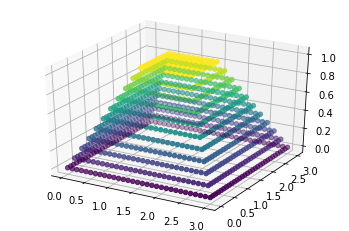

In [2]:
x = np.arange(0, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY = np.column_stack((dataX,dataY))

data_labels = []
for x, y in zip(dataX, dataY):
    x-=1.5
    y-=1.5
    data_labels.append( abs(x) if (y<x and y>-x) or (y>x and y<-x)  else abs(y) ) 
data_labels=np.array(data_labels)
#data_labels[data_labels>1.5] = 1.5
data_labels=abs(data_labels-1.5)
data_labels[data_labels>1] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataX, dataY, data_labels, c=data_labels)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

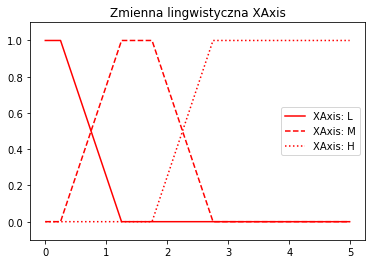

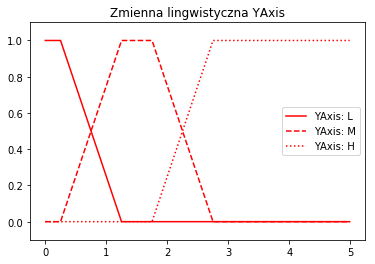

In [3]:
varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.show()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   18.571042024782102
Liczba ew:  293941
Liczba it:  100
FIS premises [[1.50005538 1.00052172 0.99950106 0.9995617 ]
 [1.48094797 1.03965743 0.1604341  0.99895353]]
TIME elapsed:  99.6421172618866


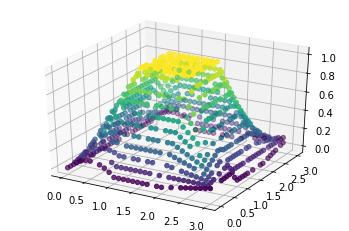

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

<H1>Zadanie</H1>

Zaimplementuj wszystkie operatory rozmyte pokazane w pliku "Najczęściej stosowane t-normy". Następnie użyj ich do uczenia powyższego systemu ANFIS, która z nich jest najlepsza, jak myślisz dlaczego?

In [5]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [6]:
%matplotlib inline